# Results

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy.stats import chi2_contingency
from thesis import get_range_percentages,get_cat_percentages
from thesis import print_attr_stats,plot_graph,analyse_range,analyse_category

In [2]:
#The labels were very light color, so removed this styling
# set the sytle only if necessary

#plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')

In [2]:
# Read the data from csv files
patients_df = pd.read_csv("thesis_patient.csv")
pdf_a = patients_df[patients_df.group=="A"]
pdf_b = patients_df[patients_df.group=="B"]
sites_df = pd.read_csv("thesis_sites.csv")
sdf_a = sites_df[sites_df.group=="A"]
sdf_b = sites_df[sites_df.group=="B"]

A total of **11** patients were enrolled in the study, which included 30 vitiligo sites for split thickness skin grafting (STSG) (Group A) and 30 sites for autologous noncultured melanocyte transfer (AMT)(Group B). Though 30 sites each were subjected to surgery in both the groups,Therefore data of only 30 sites each of both the groups(total of 11 patients) were considered for the statistical analysis

## Age Wise Distribution of patients

In [7]:
# Set the input data
attribute = "age"
age_ranges = [[12,25],[26,50]]
age_unit = "Years"
data = (pdf_a,pdf_b)

In [8]:
# Print stats
print_attr_stats(patients_df,attribute)
print_attr_stats(pdf_a,attribute)
print_attr_stats(pdf_b,attribute)

age Statistics
Number of elements:11
ranges from 12 to 42 with mean=24.09 and SD=10.83
age Statistics
Number of elements:6
ranges from 12 to 22 with mean=18.00 and SD=3.52
age Statistics
Number of elements:5
ranges from 15 to 42 with mean=31.40 and SD=12.46


In [9]:
# Analyze data
(mydf,obs,chi_square_value,p_value) = analyse_range(data,age_ranges,attribute,age_unit)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:4.950,p_value:0.026


In [10]:
mydf.head()

,12-25 Years,26-50 Years
Group-A,100,0
Group-B,40,60


In [12]:
print(obs)

[[ 6.  0.]
 [ 2.  3.]]


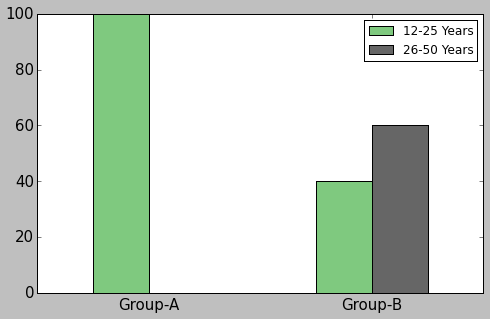

In [14]:
#mydf.plot(kind='bar',fontsize=15,figsize=(8,5),colormap=matplotlib.cm.Accent,rot=360)
plot_graph(mydf,style="grayscale",fname="age_distribution")

## Gender Wise Distribution of patients

In [15]:
# Set the input data
attribute = "gender"
data = (pdf_a,pdf_b)

In [16]:
# Analyze data
mydf,obs,chi_square_value,p_value = analyse_category(data,attribute)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:4.412,p_value:0.036


In [17]:
mydf.head()

,F,M
Group-A,83.333333,16.666667
Group-B,20.000000,80.000000


In [18]:
print(obs)

[[ 5.  1.]
 [ 1.  4.]]


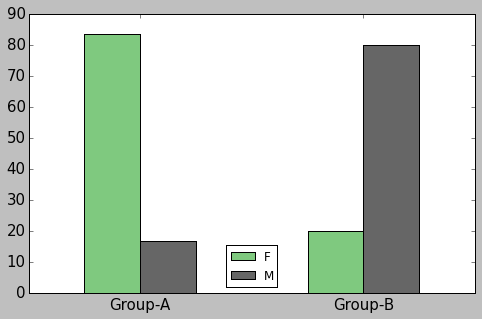

In [19]:
#mydf.plot(kind='bar',title="Gender wise Distribution\n",colormap=matplotlib.cm.Accent)
plot_graph(mydf,style="grayscale",fname="gender_distribution")

## Duration of Vitiligo by sites

In [35]:
# Set the input data
attribute = "duration_of_vitiligo_yrs"
dur_ranges = [[1,5],[6,10],[11,20],[21,100]]
dur_unit = "Years"
data = (sdf_a,sdf_b)

In [36]:
# print stats
print_attr_stats(sites_df,attribute)
print_attr_stats(sdf_a,attribute)
print_attr_stats(sdf_b,attribute)

duration_of_vitiligo_yrs Statistics
Number of elements:60
ranges from 2 to 32 with mean=18.77 and SD=9.61
duration_of_vitiligo_yrs Statistics
Number of elements:30
ranges from 3 to 15 with mean=12.13 and SD=4.31
duration_of_vitiligo_yrs Statistics
Number of elements:30
ranges from 2 to 32 with mean=25.40 and SD=8.85


In [37]:
# Analyze
mydf,obs,chi_square_value,p_value = analyse_range(data,dur_ranges,attribute,dur_unit)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:51.111,p_value:0.000


In [38]:
mydf.head()

,1-5 Years,6-10 Years,11-20 Years,>21 Years
Group-A,16.666667,6.666667,76.666667,0.000000
Group-B,13.333333,0.000000,0.000000,86.666667


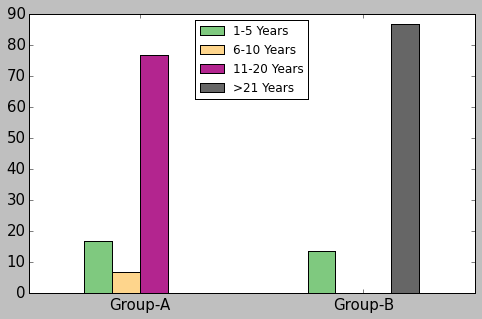

In [39]:
plot_graph(mydf,style="grayscale",fname="duration_vitiligo")

## Stability Duration by site

In [46]:
# Set the input data
attribute = "stability_yrs"
stb_ranges = [[1,2],[3,5],[6,10],[11,100]]
stb_unit = "Years"
data = (sdf_a,sdf_b)

In [47]:
# print Stats
print_attr_stats(sites_df,attribute)
print_attr_stats(sdf_a,attribute)
print_attr_stats(sdf_b,attribute)

stability_yrs Statistics
Number of elements:60
ranges from 1 to 12 with mean=5.95 and SD=4.03
stability_yrs Statistics
Number of elements:30
ranges from 1 to 4 with mean=2.77 and SD=0.99
stability_yrs Statistics
Number of elements:30
ranges from 1 to 12 with mean=9.13 and SD=3.33


In [48]:
# Analyze
mydf,obs,chi_square_value,p_value = analyse_range(data,stb_ranges,attribute,stb_unit)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:48.923,p_value:0.000


In [43]:
mydf.head()

,1-2 Years,3-5 Years,6-10 Years,>11 Years
Group-A,30.000000,70,0,0.000000
Group-B,13.333333,0,70,16.666667


In [44]:
print(obs)

[[  9.  21.   0.   0.]
 [  4.   0.  21.   5.]]


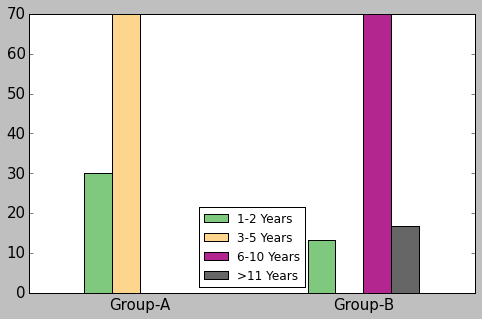

In [49]:
plot_graph(mydf,style="grayscale",fname="stability_vitiligo")

## Type of Vitiligo Distribution by sites

In [51]:
# Set input data
attribute = "type_of_vitiligo"
data = (sdf_a,sdf_b)
categories = sites_df.type_of_vitiligo.unique()

In [52]:
# Analyze data
mydf,obs,chi_square_value,p_value = analyse_category(data,attribute,categories=categories)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:4.286,p_value:0.117


In [53]:
mydf.head()

,Segmental vitiligo,Non Segmental,Focal viitligo
Group-A,10,86.666667,3.333333
Group-B,0,100.000000,0.000000


In [54]:
print(obs)

[[  3.  26.   1.]
 [  0.  30.   0.]]


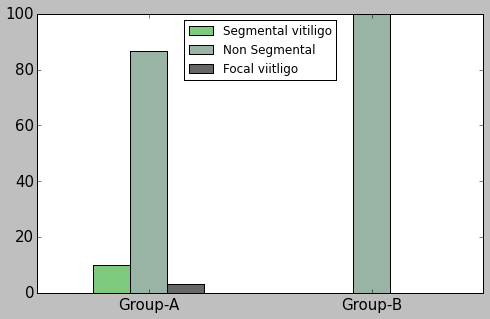

In [55]:
plot_graph(mydf,style="grayscale",fname="type_of_vitiligo")

## Sites of Vitiligo

In [3]:
# Set input data
attribute = "norm_sites"
data = (sdf_a,sdf_b)
categories = sites_df.norm_sites.unique()

In [4]:
# Analyze data
mydf,obs,chi_square_value,p_value = analyse_category(data,attribute,categories=categories)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:15.201,p_value:0.055


In [58]:
mydf.head()

,Leg,Ankle,Hand,Wrist,Foot,Abdomen,Face,Knee,Forearm
Group-A,30.000000,36.666667,3.333333,3.333333,10.000000,6.666667,10,0.000000,0.000000
Group-B,43.333333,26.666667,3.333333,0.000000,3.333333,0.000000,0,6.666667,16.666667


In [385]:
print(obs)

array([[  9.,  11.,   1.,   1.,   3.,   2.,   3.,   0.,   0.],
       [ 13.,   8.,   1.,   0.,   1.,   0.,   0.,   2.,   5.]])

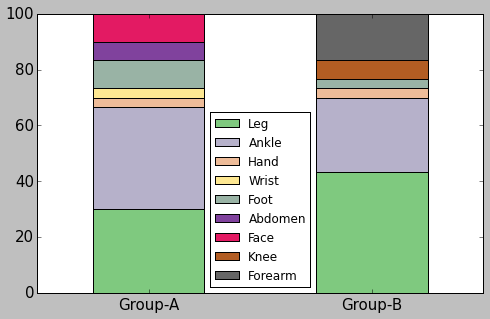

In [5]:
plot_graph(mydf,style="grayscale",fname="sites_of_vitiligo",stacked=True)

## Onset distribution by sites

In [6]:
# Set input data
attribute = "onset"
data = (sdf_a,sdf_b)
onset_ranges = [[1,14],[15,30],[31,90]]
onset_unit = "days"

In [7]:
# Print stats
print_attr_stats(sites_df,attribute)
print_attr_stats(sdf_a,attribute)
print_attr_stats(sdf_b,attribute)

onset Statistics
Number of elements:60
ranges from 8 to 90 with mean=28.15 and SD=17.88
onset Statistics
Number of elements:30
ranges from 8 to 30 with mean=13.97 and SD=4.79
onset Statistics
Number of elements:30
ranges from 20 to 90 with mean=42.33 and SD=14.55


In [8]:
# Analyze
mydf,obs,chi_square_value,p_value = analyse_range(data,onset_ranges,attribute,onset_unit)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:31.200,p_value:0.000


In [9]:
mydf.head()

,1-14 days,15-30 days,31-90 days
Group-A,40,60,0
Group-B,0,40,60


In [10]:
print(obs)

[[ 12.  18.   0.]
 [  0.  12.  18.]]


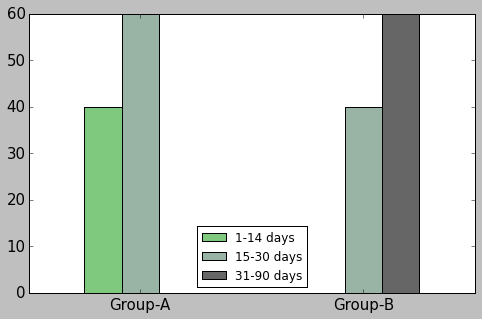

In [11]:
plot_graph(mydf,style="grayscale",fname="onset_vitiligo")

## Type of Repigmentation

In [14]:
# Set input data
attribute = "type_of_repigmentation"
data = (sdf_a,sdf_b)
categories = sites_df[attribute].unique()

In [15]:
# Analyze data
mydf,obs,chi_square_value,p_value = analyse_category(data,attribute,categories=categories)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:21.818,p_value:0.000


In [16]:
mydf.head()

,Perifollicular,Diffuse,Marginal
Group-A,33.333333,66.666667,0
Group-B,6.666667,43.333333,50


In [17]:
print(obs)

[[ 10.  20.   0.]
 [  2.  13.  15.]]


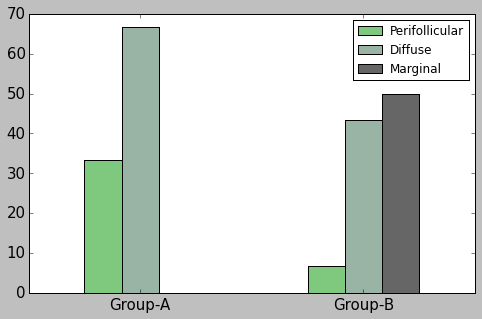

In [18]:
plot_graph(mydf,style="grayscale",fname="type_of_repigmentation")

## Degree of Repigmentation ( after 1 month)

In [32]:
# Set input data
attribute = "DOR_01"
dor_ranges = [[0,25],[26,50],[51,75],[76,100]]
dor_unit = "days"
data = (sdf_a,sdf_b)

In [39]:
# Print tsts
print_attr_stats(sites_df,attribute)
print_attr_stats(sdf_a,attribute)
print_attr_stats(sdf_b,attribute)

DOR_01 Statistics
Number of elements:60
ranges from 0 to 100 with mean=58.08 and SD=30.99
DOR_01 Statistics
Number of elements:30
ranges from 50 to 100 with mean=74.67 and SD=16.13
DOR_01 Statistics
Number of elements:30
ranges from 0 to 100 with mean=41.50 and SD=33.53


In [35]:
# Analyze
mydf,obs,chi_square_value,p_value = analyse_range(data,dor_ranges,attribute,dor_unit)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

chi-square:24.772,p_value:0.000


In [36]:
mydf.head()

,0-25 days,26-50 days,51-75 days,>76 days
Group-A,0.000000,23.333333,23.333333,53.333333
Group-B,46.666667,30.000000,0.000000,23.333333


In [37]:
print(obs)

[[  0.   7.   7.  16.]
 [ 14.   9.   0.   7.]]


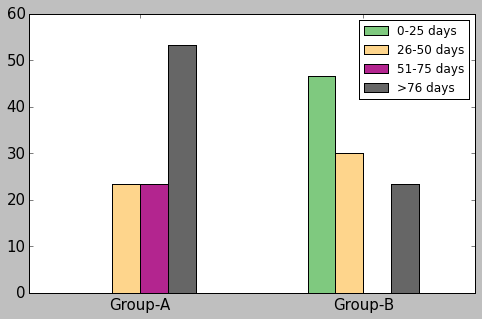

In [38]:
plot_graph(mydf,style="grayscale",fname="dor_01")

## Degree of Repigmentation ( after 3 months)

In [44]:
# Set input data
attribute = "DOR_03"
dor_ranges = [[0,25],[26,50],[51,75],[76,100]]
dor_unit = "days"
data = (sdf_a,sdf_b)

In [45]:
# Print tsts
print_attr_stats(sites_df,attribute)
print_attr_stats(sdf_a,attribute)
print_attr_stats(sdf_b,attribute)

DOR_03 Statistics
Number of elements:60
ranges from 10 to 100 with mean=68.28 and SD=34.09
DOR_03 Statistics
Number of elements:30
ranges from 50 to 100 with mean=91.07 and SD=14.93
DOR_03 Statistics
Number of elements:30
ranges from 10 to 100 with mean=45.50 and SD=32.68


In [46]:
# Analyze
mydf,obs,chi_square_value,p_value = analyse_range(data,dor_ranges,attribute,dor_unit)
print "chi-square:%.3f,p_value:%.3f"%(chi_square_value,p_value)

ValueError: The internally computed table of expected frequencies has a zero element at (0, 2).